# EDA

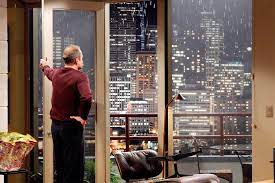

# Importing the Data Set

Using the following commands in DBeaver to get the data/merge tables:
```
SET SCHEMA 'eda';
SELECT k1.*, k2.date, k2.price
FROM king_county_house_details k1
INNER JOIN king_county_house_sales k2
ON k1.id = k2.house_id; 
```

The file is saved in data/king_county_house_details_sales.csv

In [44]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Library to visualize the missing the data
import missingno as msno

# Plot to identify poor neighborhoods
import altair as alt
import json
# Reprojecting geometrical data to adapt the coordinate system
import geopandas as gpd

# from vega_datasets import data as vega_data

import plotly.express as px
import plotly.graph_objects as go




Importing the merged data_set from a csv file. Which has already two joined tables to include price and it's date

In [154]:
df_kch = pd.read_csv('data/king_county_housing_details_a_sales.csv')

In [109]:
# Get info about the database: number of non null rows and data types
print(df_kch.info())
# Dimension of the dataset
print("Shape of the dataset:",np.shape(df_kch))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Notes: 
- Waterfront, view, yr_renovated has some missing values
- Grade and Condition is in int
- Date is a string

In [155]:
# Convert yr_renovated to datetime
# columns_with_zero_to_nan = ['yr_renovated']  # Add more columns as needed
# df_kch[columns_with_zero_to_nan] = df_kch[columns_with_zero_to_nan].replace(np.nan,0.0)

# Create a new column with the converted values
df_kch['yr_renovated_new'] = df_kch['yr_renovated'].apply(lambda x: math.ceil(x / 10) if isinstance(x, (int, float)) and not np.isnan(x) else x)

# Assign the values from the new column back to the original column
df_kch['yr_renovated'] = df_kch['yr_renovated_new']

# Drop the new column
# df_kch = df_kch.drop(columns=['yr_renovated_new'])
unique_values = df_kch['yr_renovated'].unique()

# Display the data types of yr_renovated column
print(unique_values)
print(df_kch['yr_renovated'][0].dtype)

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
float64


In [156]:
print(df_kch['yr_renovated'][0])
df_kch.head(5)

0.0


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,yr_renovated_new
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,0.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,1991.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,1991.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,NaN
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,0.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,0.000


Converting the type of the date:

In [6]:
# converting the data type of date to date
df_kch['date'] = pd.to_datetime(df_kch['date'], format='%Y-%m-%d')

# Investigating simple statistics for columns & nan values & duplicates

In [7]:
# Basic statistics analysis of the columns:
print(df_kch.describe())

                 id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19206.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007602      0.233863      3.409825      7.657915   
std        0.539683      0.086858      0.765686    

Compared to Berlin: 
 - the sqft of living is 5 times 
 - waterfront, view, yr_renovated, sqft-basement show uncammon values for 25%,50%,min .... 

In [8]:
print("Unique values for the waterfront:",df_kch["waterfront"].unique())
print("Unique values for the year renovated:",df_kch["yr_renovated"].unique())
print("Unique values for the condition:",df_kch["condition"].min(),"-",df_kch["condition"].max())
print("Unique values for the grade:",df_kch["grade"].min(),"-",df_kch["grade"].max())

Unique values for the waterfront: [nan  0.  1.]
Unique values for the year renovated: [    0. 19910.    nan 20020. 20100. 19920. 20130. 19940. 19780. 20050.
 20030. 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770.
 19810. 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070.
 19870. 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690.
 19480. 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620.
 19530. 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750.
 19640. 19730. 19570. 19590. 19600. 19670. 19650. 19340. 19720. 19440.
 19580.]
Unique values for the condition: 1 - 5
Unique values for the grade: 3 - 13


<Axes: >

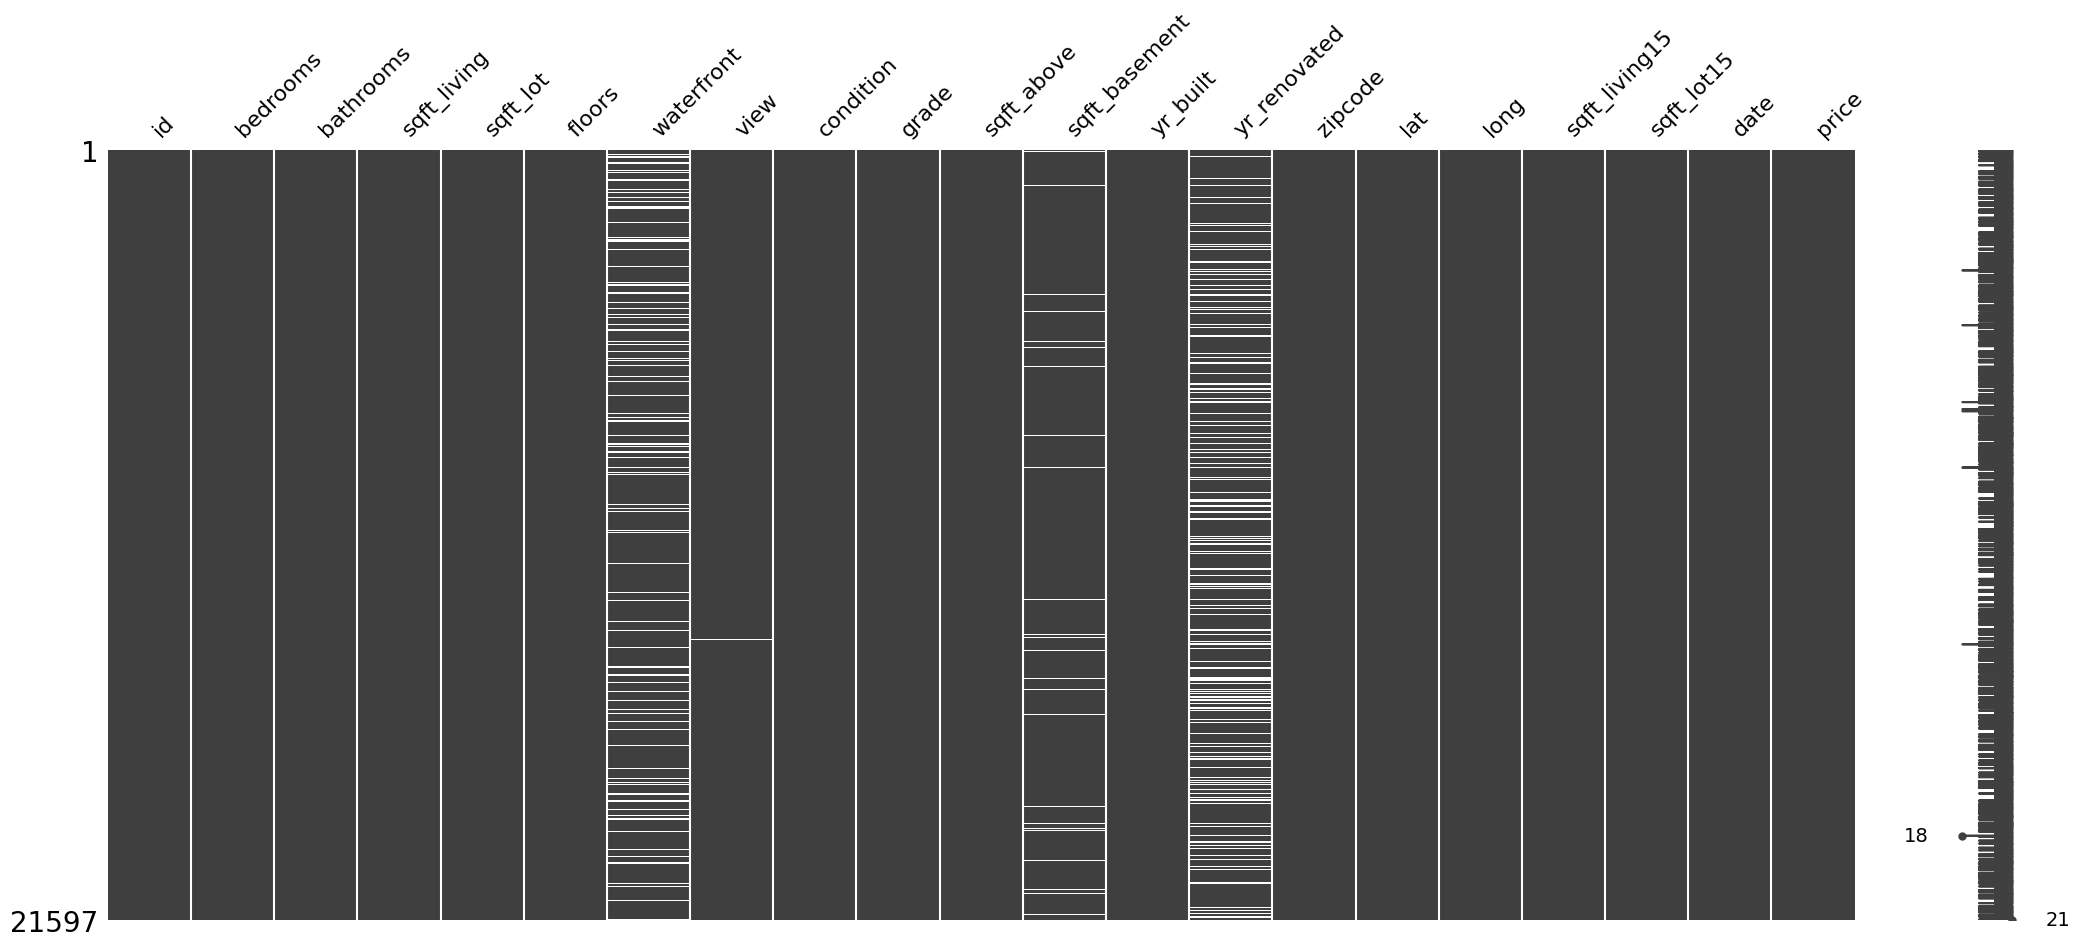

In [9]:
msno.matrix(df_kch)

Notes: waterfront,view, sqft_basement,yr_renovated has missing values

Basic statistical analysis of the columns:

In [10]:
# check how many duplicated rows exist in the data frame
df_kch.duplicated().value_counts()

False    21597
dtype: int64

In [11]:
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Investigating outliers

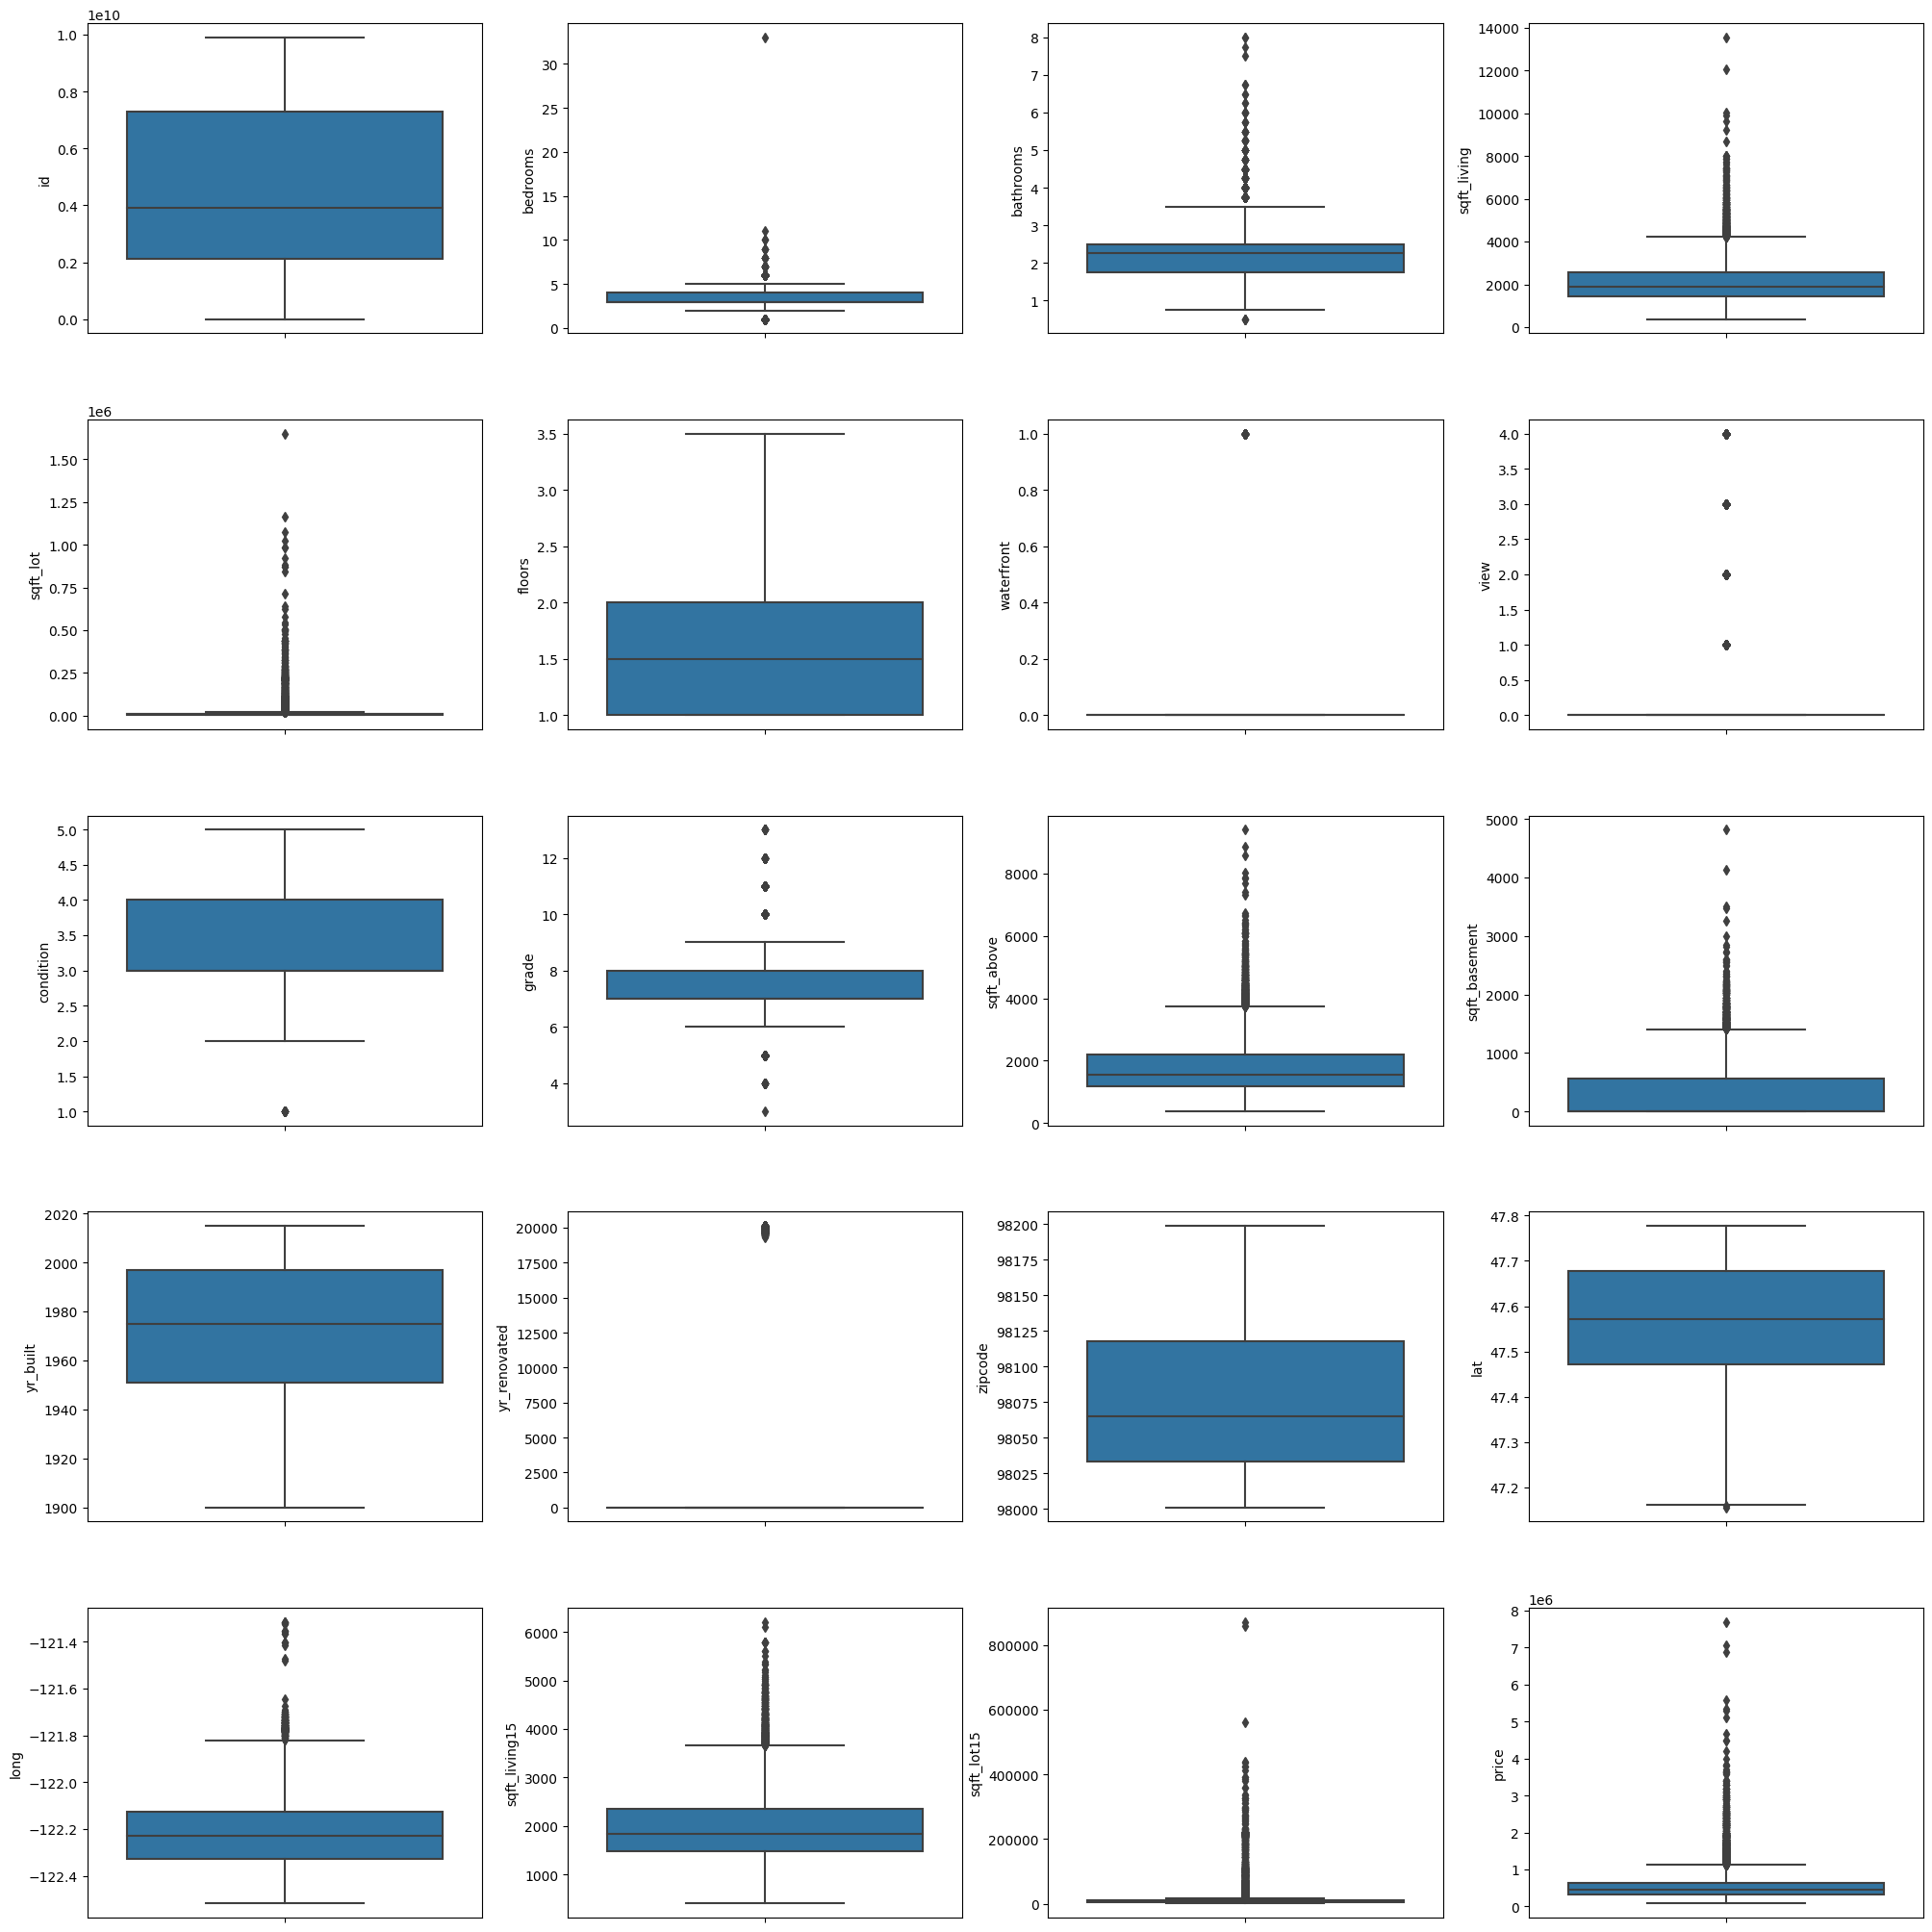

In [12]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20,20))
index = 0
axs = axs.flatten()
for k,v in df_kch.items():
    if k!="date":
        sns.boxplot(y=k, data=df_kch, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
# Percentage of outliers
for key, value in df_kch.items():
    # q1 and q3: lower and upper quartiles
    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    # interuartile range
    ir = q3 - q1
    # only outliers
    v_col = value[(value <= q1 - 1.5 * ir) | (value >= q3 + 1.5 * ir)]
    # percentage of outliers, but waterfront,view, sqft_basement,yr_renovated has still missing values
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_kch)[0]
    print("Column %s outliers = %.2f%%" % (key, perc))

Column id outliers = 0.00%
Column bedrooms outliers = 2.45%
Column bathrooms outliers = 2.60%
Column sqft_living outliers = 2.69%
Column sqft_lot outliers = 11.20%
Column floors outliers = 0.03%
Column waterfront outliers = 88.93%
Column view outliers = 99.71%
Column condition outliers = 0.13%
Column grade outliers = 8.82%
Column sqft_above outliers = 2.86%
Column sqft_basement outliers = 2.42%
Column yr_built outliers = 0.00%
Column yr_renovated outliers = 82.18%
Column zipcode outliers = 0.00%
Column lat outliers = 0.01%
Column long outliers = 1.18%
Column sqft_living15 outliers = 2.51%
Column sqft_lot15 outliers = 10.13%
Column date outliers = 0.00%
Column price outliers = 5.36%


# Customer Profile
Erin Robinson:
- Buyer, 
- Invest in poor neighborhood, 
- buying & selling, 
- costs back + little profit, 
- socially responsible  


Steps:
- Identifying poor neighborhoods
    - using the house grading system 1-13 of King County

In [22]:
df_kch.head(2)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000


In [62]:
# Set initial center coordinates and zoom level
initial_center = {"lat": df_kch["lat"].mean(), "lon": df_kch["long"].mean()}
initial_zoom = 10  # Adjust the zoom level as needed

# Define the grid dimensions (number of bins)
num_bins_x = 200
num_bins_y = 200


# Calculate bin edges
x_edges = np.linspace(df_kch["long"].min(), df_kch["long"].max(), num_bins_x + 1)
y_edges = np.linspace(df_kch["lat"].min(), df_kch["lat"].max(), num_bins_y + 1)

# Use numpy.digitize to assign data points to bins
x_bin_indices = np.digitize(df_kch["long"], x_edges) - 1
y_bin_indices = np.digitize(df_kch["lat"], y_edges) - 1

# Aggregate data into rectangular bins
bin_avg_grades = np.zeros((num_bins_y, num_bins_x))

# Calculate average grades for each bin
for i in range(num_bins_y):
    for j in range(num_bins_x):
        mask = (x_bin_indices == j) & (y_bin_indices == i)
        if np.any(mask):
            bin_avg_grades[i, j] = np.mean(df_kch.loc[mask, "grade"])

# Define a color scale with transparency
colorscale = [
    [0, "rgba(0, 0, 0, 0)"],  # Transparent
    [0.2, "rgb(0, 92, 175)"],  # Blue
    [0.4, "rgb(0, 158, 115)"],  # Green
    [0.6, "rgb(254, 190, 60)"],  # Yellow
    [1.0, "rgb(213, 94, 0)"]  # Orange
]
# Create a heatmap-like representation using go.Heatmap
heatmap = go.Heatmap(
    z=bin_avg_grades,
    x=(x_edges[:-1] + x_edges[1:]) / 2,
    y=(y_edges[:-1] + y_edges[1:]) / 2,
    colorscale=colorscale,  # Choose a colorscale
    showscale=True  # Show the color scale legend
)

fig = go.Figure(heatmap)

# fig = px.scatter_geo(df_kch,
#                      lat="lat", lon="long",
#                      text="grade",
#                      color_discrete_sequence=["tomato"],
#                      size_max=5)#,
#                     #  center=initial_center,
#                     #  scope="north america",  # Adjust the scope as needed
#                     #  projection_scale=10)# Adjust the size of the markers


# Update the figure layout to set focus and zoom
fig.update_geos(
    projection_type="albers usa",  # Set the projection type
    center={"lat": initial_center["lat"], "lon": initial_center["lon"]},  # Center on the initial center
    visible=False,  # Hide the default world map
    showland=True,  # Show land outlines
    projection_scale=0
)
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=600  # Set the height of the figure
)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0}  # Adjust margins to reduce white space
)

# Show the plot
fig.show()

In [16]:
houses_gdf.geometry[0].x
print(houses_gdf['geometry'].head())

0    POINT (-122.25700 47.51120)
1    POINT (-122.31900 47.72100)
2    POINT (-122.23300 47.73790)
3    POINT (-122.39300 47.52080)
4    POINT (-122.04500 47.61680)
Name: geometry, dtype: geometry


In [17]:
# Load the GeoJSON data using geopandas
# web page: https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::metropolitan-king-county-council-kccdst-area/explore?location=47.521009%2C-121.704444%2C8.98
# following contains nice example: https://github.com/altair-viz/altair/issues/588


# importing this allows to access the properties for the plot
# with open("data/Metropolitan_King_County_Council___kccdst_area.geojson") as f:
with open("data/Cities_and_Unincorporated_King_County___city_kc_area.geojson") as f:
    geojson_data = json.load(f)
geoData = alt.Data(values=geojson_data['features'])